In [112]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [110]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameString          79931 non-null  object 
 1   gameDate            79931 non-null  object 
 2   visitor             79931 non-null  object 
 3   home                79931 non-null  object 
 4   inning              79931 non-null  int64  
 5   side                79931 non-null  object 
 6   balls               79931 non-null  int64  
 7   strikes             79931 non-null  int64  
 8   outs                79931 non-null  int64  
 9   batterId            79931 non-null  int64  
 10  batterName          79931 non-null  object 
 11  batterHand          79931 non-null  object 
 12  batterPosition      79931 non-null  object 
 13  pitcherId           79931 non-null  int64  
 14  pitcherName         79931 non-null  object 
 15  pitcherHand         79931 non-null  object 
 16  time

In [227]:

dfnum = df.select_dtypes(exclude = 'object')

dfnum = dfnum.loc[:,'releaseVelocity':'battedBallDistance']
dfnum['pitchType'] =df['pitchType'] 
dfnum.dropna(inplace=True)
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13441 entries, 2 to 79930
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   releaseVelocity     13441 non-null  float64
 1   spinRate            13441 non-null  float64
 2   spinDir             13441 non-null  float64
 3   locationHoriz       13441 non-null  float64
 4   locationVert        13441 non-null  float64
 5   movementHoriz       13441 non-null  float64
 6   movementVert        13441 non-null  float64
 7   battedBallAngle     13441 non-null  float64
 8   battedBallDistance  13441 non-null  float64
 9   pitchType           13441 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [228]:
ycols=pd.DataFrame()
ycols['pitchType']= np.unique(dfnum['pitchType'])
ycols['num'] = [i for i in range(11)]
dfnum = dfnum.merge(ycols, on = 'pitchType')
dfnum

,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance,pitchType,num
0,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,27.78,323.03,FF,3
1,96.3,1909.36,203.540,-0.280,1.990,-6.03,7.98,-34.27,97.07,FF,3
2,92.1,2319.27,138.209,-0.666,2.667,6.46,9.35,2.02,305.16,FF,3
3,90.8,2386.88,158.489,0.491,1.781,4.77,11.85,-21.01,129.24,FF,3
4,91.6,2348.78,144.999,0.408,2.704,5.15,9.46,42.44,384.23,FF,3
...,...,...,...,...,...,...,...,...,...,...,...
13436,86.8,1615.91,211.758,-1.117,1.906,-5.35,1.97,-28.09,20.82,FS,4
13437,81.6,1156.32,275.207,-0.991,1.749,-4.58,-0.31,-32.09,98.97,FS,4
13438,69.1,1427.40,238.114,0.326,3.166,-8.31,4.49,43.70,336.54,KN,7
13439,67.9,1664.48,203.586,0.045,3.430,-4.52,5.07,9.05,355.40,KN,7


In [211]:
X = dfnum.drop(['pitchType', 'num'], axis = 1)
y = dfnum['num']

In [212]:
from sklearn.preprocessing import StandardScaler


In [213]:
scaler = StandardScaler()
X_std= scaler.fit_transform(X)

In [214]:
pca = PCA(n_components = 8)
pca_components = pca.fit_transform(X_std)


In [215]:
pca_components.shape[1]

8

In [216]:
yarr = np.array(y)
yarr.shape

(13441,)

In [217]:
np.unique(dfnum['pitchType'])

array(['CH', 'CU', 'FC', 'FF', 'FS', 'FT', 'KC', 'KN', 'SI', 'SL', 'UN'],
      dtype=object)

In [218]:
len([i for i in range(19)])
len(np.unique(dfnum['pitchType']))

11

In [220]:
y

0        3
1        3
2        3
3        3
4        3
        ..
13436    4
13437    4
13438    7
13439    7
13440    7
Name: num, Length: 13441, dtype: int64

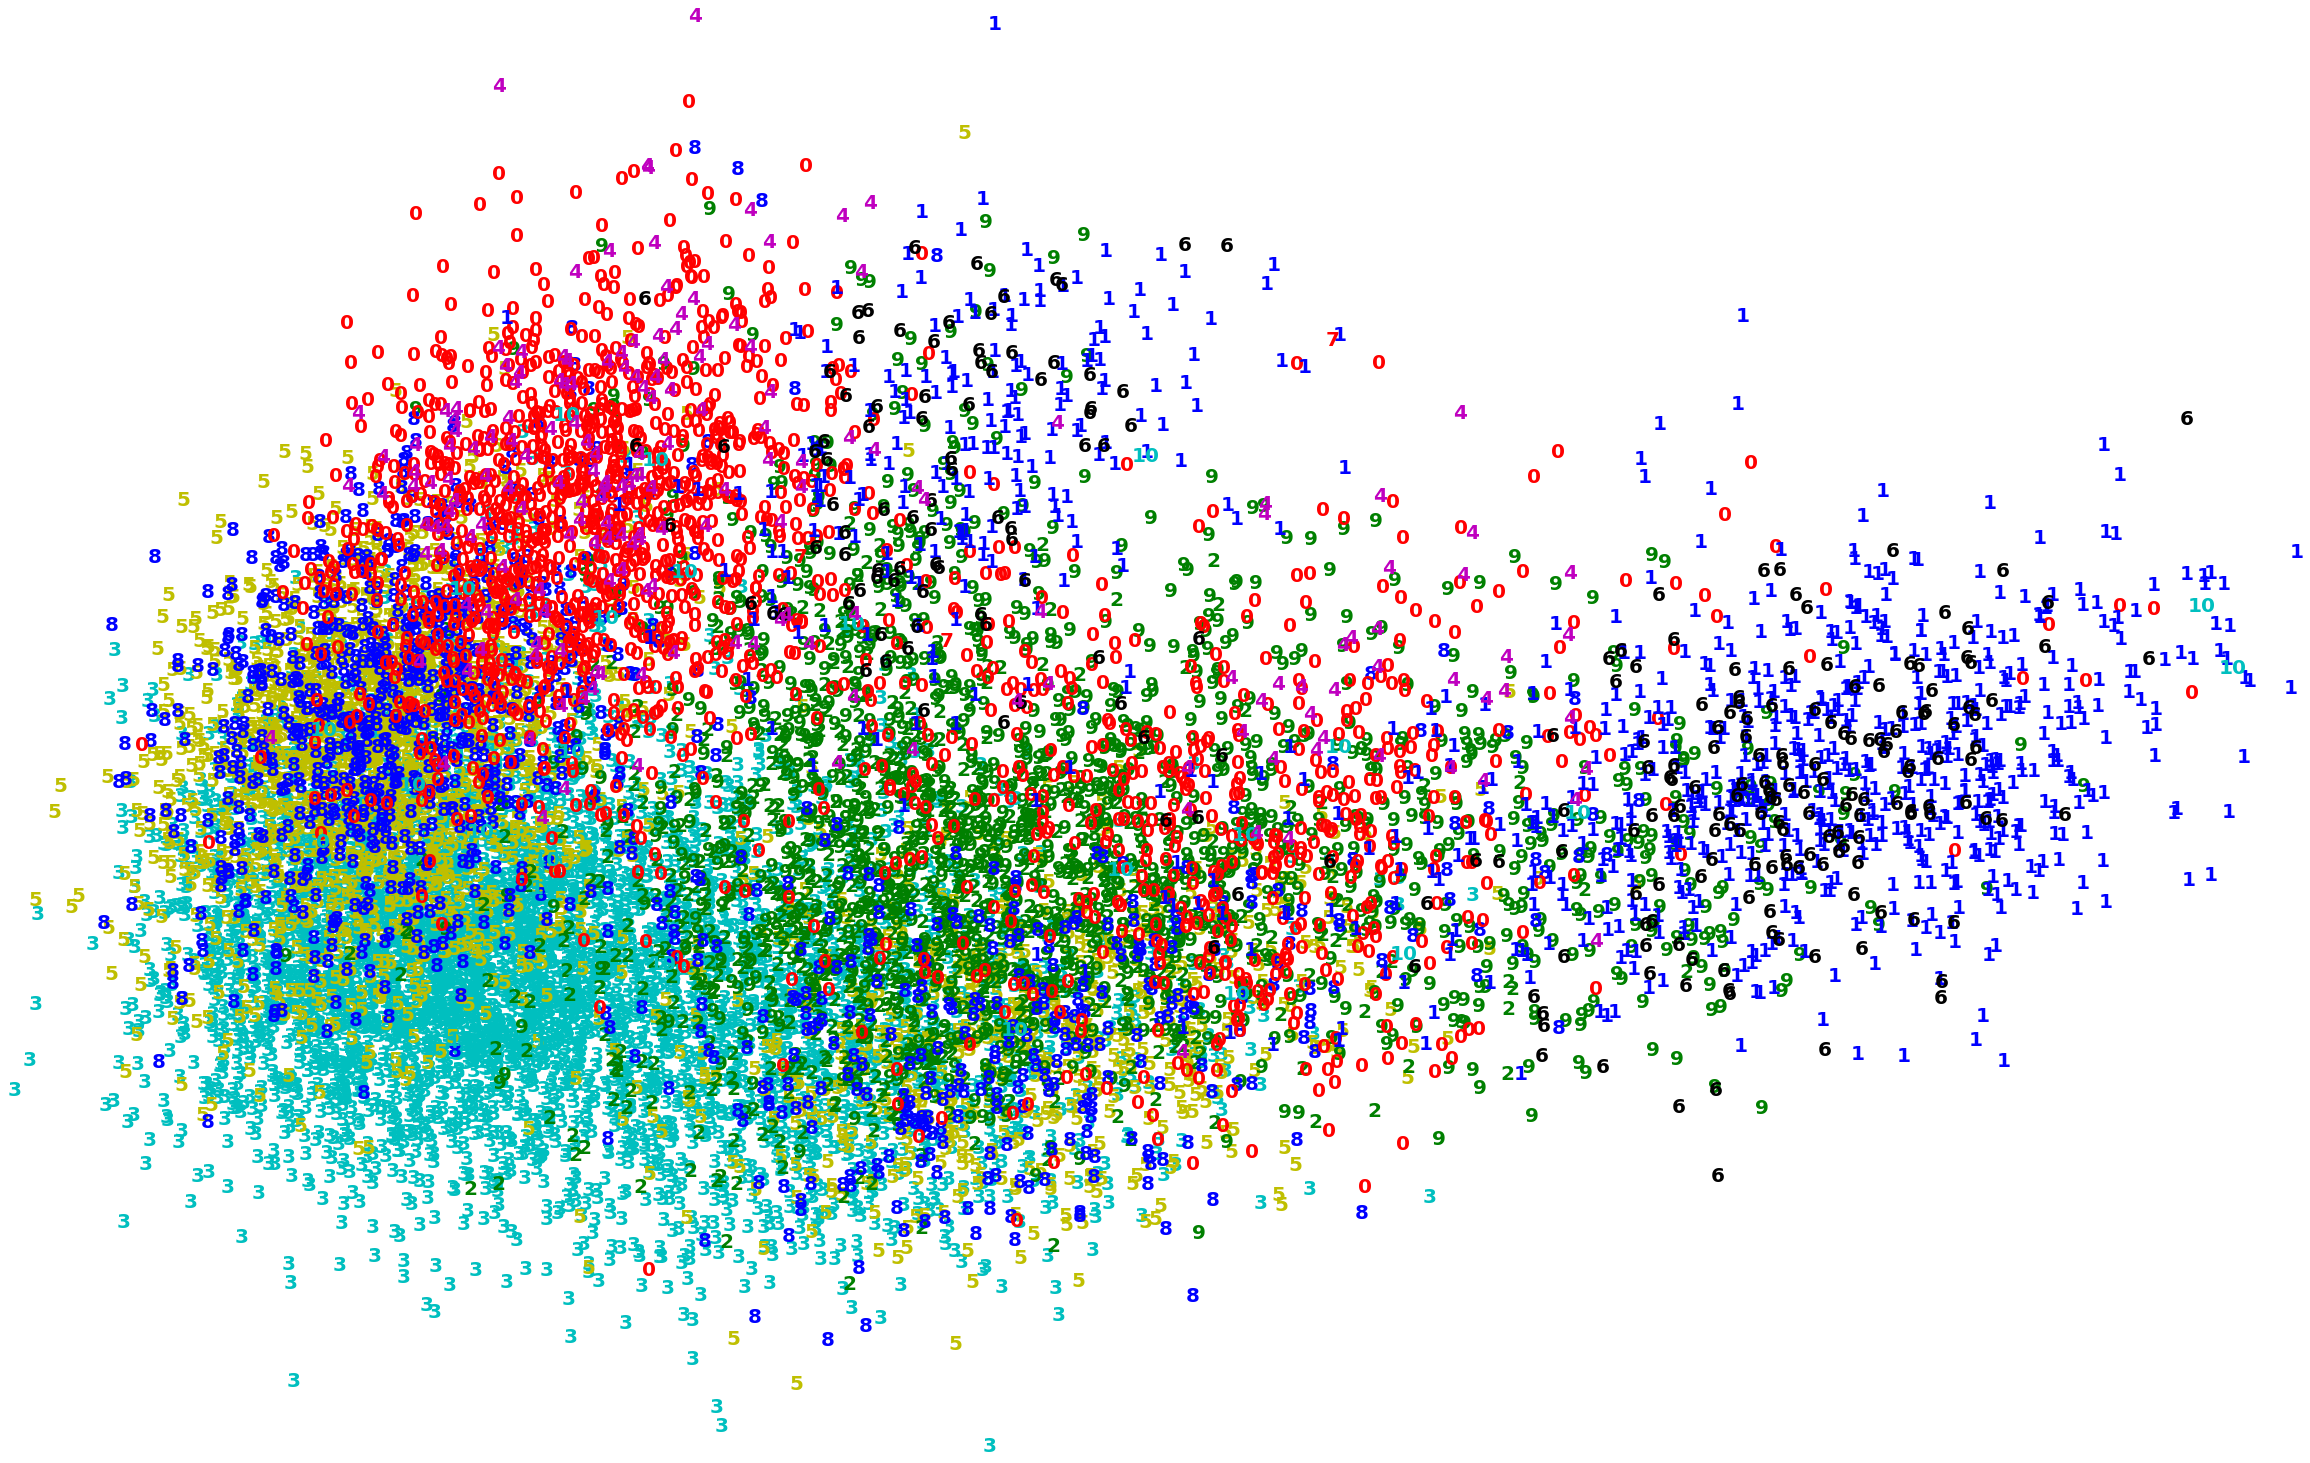

In [229]:
plt.figure(figsize=(5,3))
colours = ["r","b","g","c","m","y","k","r","b","g","c"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 20}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [240]:
import random
plt.figure(figsize=(5,3))
c = []
for _ in range(len(np.unique(y))):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    c.append(color)
c
color

(0.5760893757981191, 0.34204786613240024, 0.9986873190088619)

<Figure size 360x216 with 0 Axes>

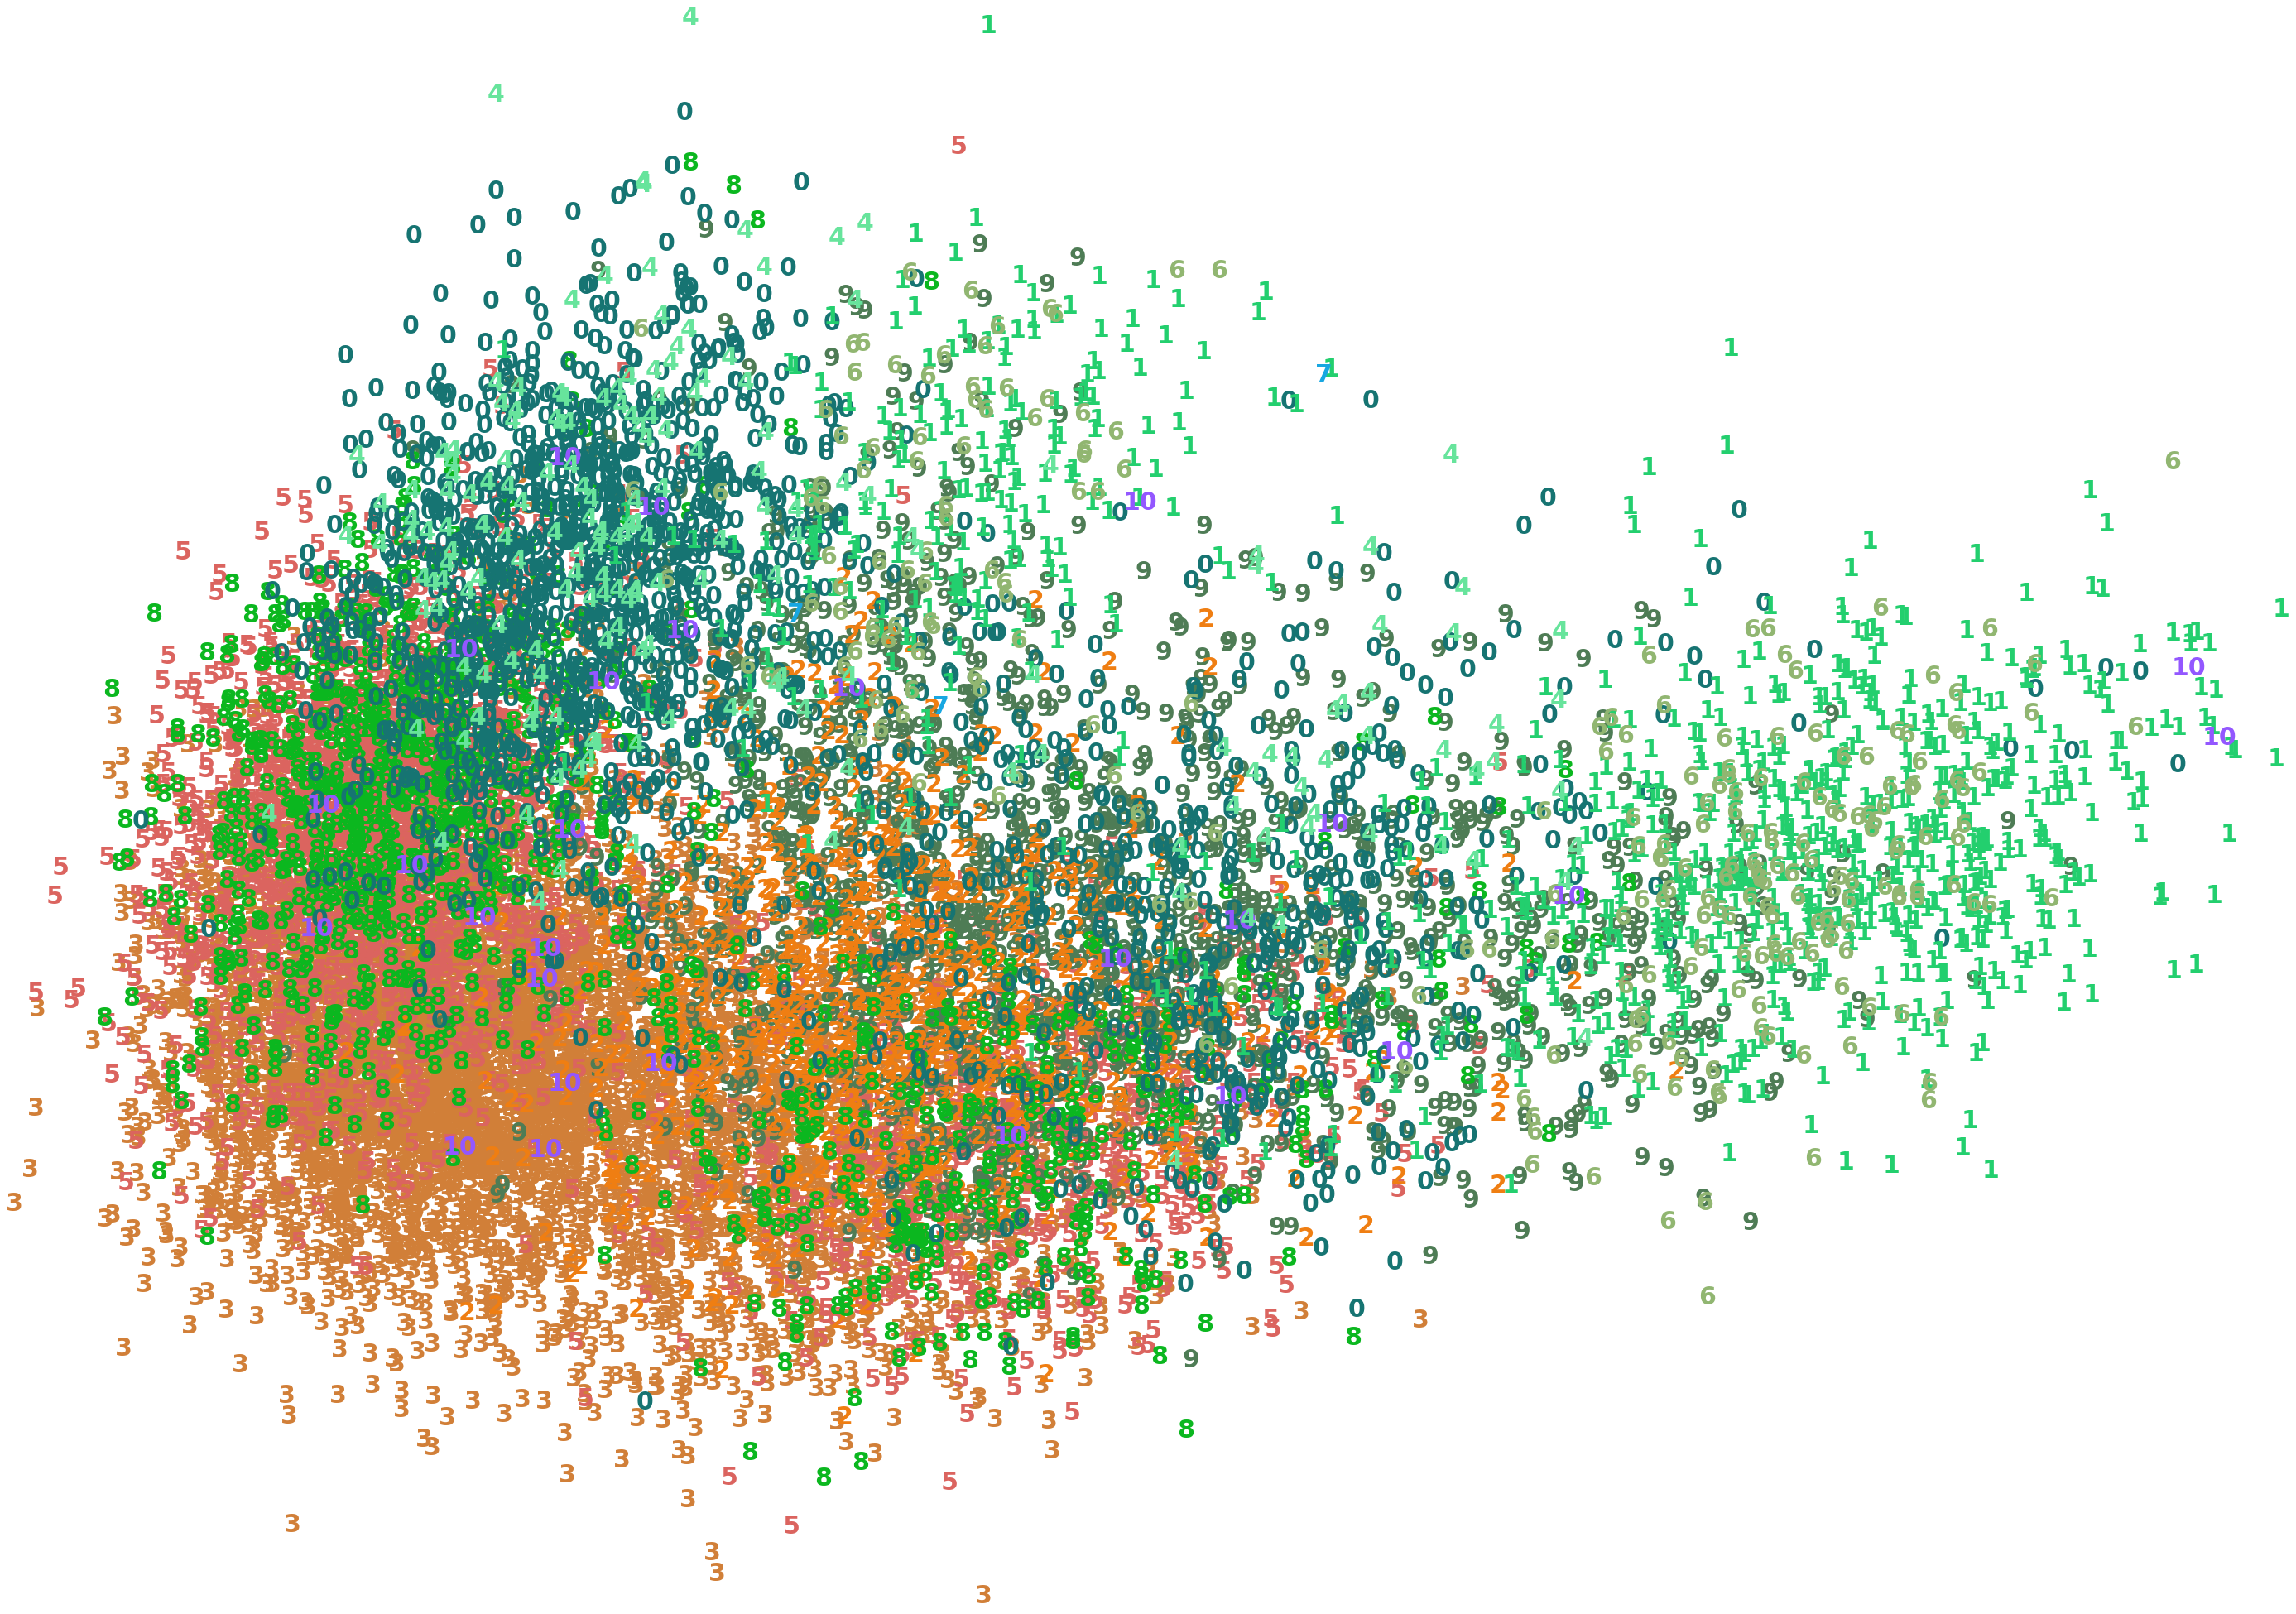

In [244]:
for i in range(pca_components.shape[0]):
    
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=c[y[i]],
             fontdict={'weight': 'bold', 'size': 30}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

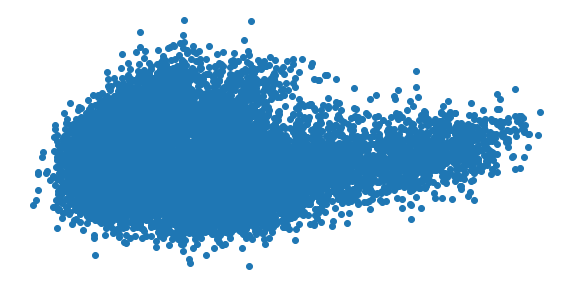

In [160]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [261]:
y2 = np.unique(dfnum['pitchType'])
y2.index()
ylist.index(dfnum['pitchType'][13000])

6

In [255]:
y2

0        FF
1        FF
2        FF
3        FF
4        FF
         ..
13436    FS
13437    FS
13438    KN
13439    KN
13440    KN
Name: pitchType, Length: 13441, dtype: object